In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os 
from random import shuffle
import cv2
TEST_DIR = 'test1/test1'
TRAIN_DIR = '/train'
LEARNING_RATE = 1e-3
MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMAGE_SIZE = 50

C:\Users\DELL PC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def label_image(img):
    img_name = img.split(".")[-3]
    if img_name == "cat":
        return [1,0]
    elif img_name == "dog":
        return [0,1]
#This Function will Return a Vector for the labels of the Data

In [4]:
#This is for Training Data
def train_data_loder():
    training_data = []
    for img in tqdm(os.listdir(path=TRAIN_DIR)):
        img_lable = label_image(img)
        path_to_img = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
        training_data.append([np.array(img),np.array(img_lable)])
        
    shuffle(training_data)
    np.save("training_data_new.npy",training_data)
    return training_data
#This is for Testing Data
def testing_data():
    test_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        img_labels = img.split(".")[0]
        path_to_img = os.path.join(TEST_DIR,img)
        img = cv2.resize(cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE),(IMAGE_SIZE,IMAGE_SIZE))
        test_data.append([np.array(img),np.array(img_labels)])
        
    shuffle(test_data)
    np.save("test_dataone.npy",test_data)
    return test_data

In [5]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [6]:
import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 1], name='input')
#Conv Layer 1
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
#Conv Layer 2
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
#Conv Layer 3
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
#Conv Layer 4
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
#Conv Layer 5
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
#Conv Layer 6
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
#Fully Connected Layer with SoftMax as Activation Function
convnet = fully_connected(convnet, 2, activation='softmax')
#Regression for ConvNet with ADAM optimizer
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
#t_data=create_train_data()
train_data_g=np.load('train_data.npy')

In [8]:
train = train_data_g[:-500]
test = train_data_g[-500:]
#This is our Training data
X = np.array([i[0] for i in train]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
Y = [i[1] for i in train]

#This is our Training data
test_x = np.array([i[0] for i in test]).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
test_y = [i[1] for i in test]

In [9]:
model.fit(X, Y, n_epoch=6, validation_set=(test_x,  test_y), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 2297  | total loss: 0.41930 | time: 100.687s
| Adam | epoch: 006 | loss: 0.41930 - acc: 0.8164 -- iter: 24448/24500
Training Step: 2298  | total loss: 0.42328 | time: 101.949s
| Adam | epoch: 006 | loss: 0.42328 - acc: 0.8129 | val_loss: 0.46190 - val_acc: 0.7840 -- iter: 24500/24500
--


In [22]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\DELL PC\Documents\jupyter\cat_dog\dogsvscats-0.001-6conv-fire.model is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
img = cv2.resize((cv2.imread('../cat_dog/puppy.png',cv2.IMREAD_GRAYSCALE)),(IMAGE_SIZE,IMAGE_SIZE,1))
#model.predict(img)

In [35]:
img=np.array(img)

In [74]:
np.shape(imgFile)

(366, 309, 3)

In [72]:
imgFile.reshape(50,50)

ValueError: cannot reshape array of size 339282 into shape (50,50)

In [67]:
imgFile = cv2.imread('../cat_dog/puppy.png')

cv2.imshow('dst_rt', imgFile)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
type(imgFile)

numpy.ndarray

In [47]:
model.predict(imgFile.reshape(50,50,1))

ValueError: cannot reshape array of size 339282 into shape (50,50,1)

In [18]:
#t=testing_data()
t=np.load("test_dataone.npy")

In [57]:
for num,data in enumerate(list(range(20))):
    print(num,data)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19


In [23]:
type(t[0])

numpy.ndarray

In [16]:
for num,data in enumerate(t[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]

NameError: name 't' is not defined

In [60]:
m=(model.predict([data.reshape(50,50,1)])[0])[0]
print(m)
if int(np.round(m)) == 0:
    str_label='Dog'
else:
    str_label='Cat'
str_label

0.8974596


'Cat'

In [51]:
cv2.imshow('dst_rt', data)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [105]:
int(np.round(m[0]))

1

In [103]:
m[0]

0.9842808

In [92]:
str_label

'Cat'

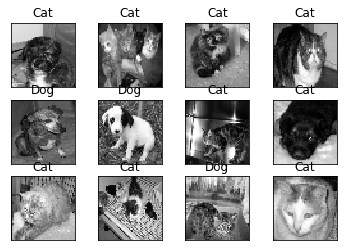

In [32]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
t = np.load('test_dataone.npy')

fig=plt.figure()

for num,data in enumerate(t[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(50,50,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [37]:
data[0][0][0]

109